# Hyperparameter optimization
    - Select the best parametrization for a specific model
    

In [1]:
from __future__ import print_function

from sklearn import __version__ as sklearn_version
print('Sklearn version:', sklearn_version)

Sklearn version: 0.18.1


# Load data

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
print(digits.data)
print(digits.target)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]


In [4]:
#Randomize and separate train & test
from sklearn.utils import shuffle
X, y = shuffle(digits.data, digits.target, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1203, 64) (594, 64) (1203,) (594,)


## RandomForestClassifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('Accuracy tree: ', accuracy_score(y_test, clf.predict(X_test)))

Accuracy tree:  0.952861952862


## Hiperparameter optimization

In [6]:
def acc(i):
    clf = RandomForestClassifier(max_features=i)
    clf.fit(X_train, y_train)
    return accuracy_score(y_test, clf.predict(X_test))

index = []
accuracy = []
for i in range(2,30):
    index += [i]
    accuracy += [acc(i)]

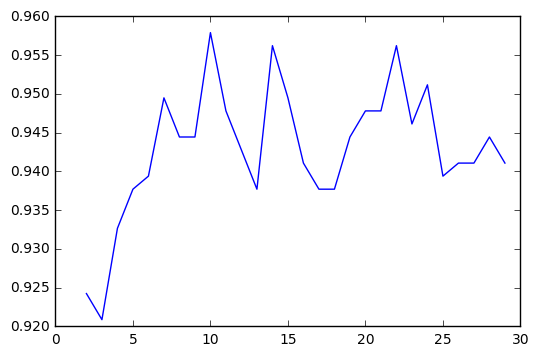

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(index,accuracy)


## Use of RandomizedSearchCV
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV 


In [8]:
import numpy as np

from time import time
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define estimator. No parameters
clf = RandomForestClassifier(n_estimators=20)




# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))


RandomizedSearchCV took 7.75 seconds for 20 candidates parameter settings.


In [9]:
print(random_search.cv_results_)

{'rank_test_score': array([16, 15,  4,  9, 17, 18, 19, 13,  1, 11, 12, 19,  3,  6,  7, 10, 14,
        5,  7,  2], dtype=int32), 'split0_train_score': array([ 0.88368201,  0.86945607,  0.99330544,  0.97991632,  0.88117155,
        0.86527197,  0.83430962,  0.87866109,  1.        ,  0.86025105,
        0.90041841,  0.87029289,  0.99414226,  0.9832636 ,  0.97824268,
        0.89037657,  0.86276151,  0.98410042,  0.98493724,  0.9958159 ]), 'split2_test_score': array([ 0.85234899,  0.84731544,  0.95469799,  0.94463087,  0.83724832,
        0.81711409,  0.84228188,  0.83557047,  0.9614094 ,  0.87416107,
        0.8557047 ,  0.85234899,  0.95805369,  0.94295302,  0.95302013,
        0.8590604 ,  0.86744966,  0.95469799,  0.94798658,  0.96644295]), 'param_min_samples_leaf': masked_array(data = [9 4 7 7 8 2 9 6 2 10 5 5 1 6 10 10 8 6 9 5],
             mask = [False False False False False False False False False False False False
 False False False False False False False False],
       fill_

In [10]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

            
report(random_search.cv_results_)       

Model with rank: 1
Mean validation score: 0.970 (std: 0.007)
Parameters: {'bootstrap': False, 'min_samples_leaf': 2, 'min_samples_split': 6, 'criterion': 'gini', 'max_features': 8, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.963 (std: 0.005)
Parameters: {'bootstrap': False, 'min_samples_leaf': 5, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 9, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.960 (std: 0.002)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 9, 'max_depth': None}



In [ ]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('Accuracy tree: ', accuracy_score(y_test, clf.predict(X_test)))

In [43]:
# Configure model
from sklearn import svm
clf_svc = svm.SVC(gamma=0.001, C=100.)

clf_svc.fit(X_train, y_train)
print(accuracy_score(y_test, clf_svc.predict(X_test)))

0.993265993266
